In [ ]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
import pymc3 as pm
import numpy as np
import seaborn as sns
import arviz as az
import matplotlib.pyplot as plt

Description of the problem:
We are going to guess the number of photons from a source:

1) All we already know is that it should be between 0 , some large number! (our prior knowledge)

2) Due to instrument errors and quantum nature of photons, our observation follows a Poisson distribution. In this case, the observed number of photons is 4 (the book considered the 100 photons too, but the pipeline is the same)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [s]


Sampling 2 chains for 1_000 tune and 20_000 draw iterations (2_000 + 40_000 draws total) took 21 seconds.


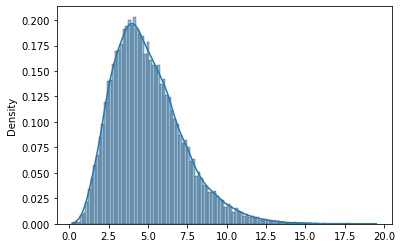

In [ ]:
with pm.Model():
    s = pm.Uniform('s',0,10**7) # s = prior
    likelihood = pm.Poisson('likelihood',mu = s,observed=4)
    trace = pm.sample(20000)

sns.histplot(trace['s'] , stat = 'density' , kde = 1)
plt.show()

In [ ]:
tracee = trace['s']
a = az.hdi(tracee,hdi_prob=0.95)
aa = [float("{:.2f}".format(a[0])),float("{:.2f}".format(a[1]))]
b = [np.mean(tracee),np.median(tracee),np.std(tracee)]
print ('95% HD interval: ',aa)
print ('posterior_mean:',round(b[0],2), '| posterior_median:',round(b[1],2),'| posterior_std:', round(b[2],2))

95% HD interval:  [1.18, 9.42]
posterior_mean: 5.0 | posterior_median: 4.66 | posterior_std: 2.23
